<a href="https://colab.research.google.com/github/siddharthramagiri/Machine-Learning/blob/main/iris_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

In [60]:
iris_data = pd.read_csv('/content/Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
iris_data = iris_data.drop(columns=['SepalLengthCm',	'SepalWidthCm'])
iris_data

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


In [62]:
iris_data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'PetalLengthCm')

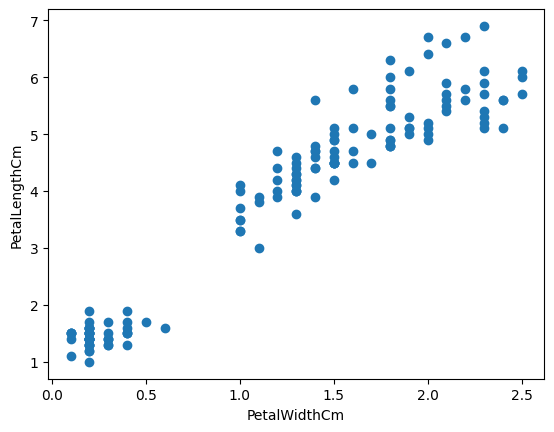

In [64]:
plt.scatter(iris_data['PetalWidthCm'],iris_data['PetalLengthCm'])
plt.xlabel("PetalWidthCm")
plt.ylabel("PetalLengthCm")

In [65]:
kmns = KMeans(n_clusters=3)
y_predicted = kmns.fit_predict(iris_data[['PetalWidthCm','PetalLengthCm']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [66]:
iris_data['prediction'] = y_predicted
iris_data

,Id,PetalLengthCm,PetalWidthCm,Species,prediction
0,1,1.4,0.2,Iris-setosa,0
1,2,1.4,0.2,Iris-setosa,0
2,3,1.3,0.2,Iris-setosa,0
3,4,1.5,0.2,Iris-setosa,0
4,5,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...
145,146,5.2,2.3,Iris-virginica,1
146,147,5.0,1.9,Iris-virginica,1
147,148,5.2,2.0,Iris-virginica,1
148,149,5.4,2.3,Iris-virginica,1


In [67]:
centers = pd.DataFrame(kmns.cluster_centers_)
centers

,0,1
0,0.244000,1.464000
1,2.037500,5.595833
2,1.342308,4.269231


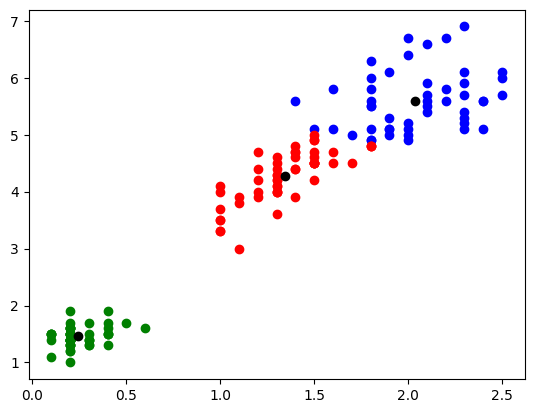

In [68]:
df1 = iris_data[iris_data['prediction'] == 0]
df2 = iris_data[iris_data['prediction'] == 1]
df3 = iris_data[iris_data['prediction'] == 2]

plt.scatter(df1['PetalWidthCm'],df1['PetalLengthCm'],color='green')
plt.scatter(df2['PetalWidthCm'],df2['PetalLengthCm'],color='blue')
plt.scatter(df3['PetalWidthCm'],df3['PetalLengthCm'],color='red')
plt.scatter(centers.iloc[:,0],centers.iloc[:,1],color='black')
plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(iris_data[['PetalWidthCm','PetalLengthCm']])
iris_data[['PetalWidthCm','PetalLengthCm']] = scalar.transform(iris_data[['PetalWidthCm','PetalLengthCm']])

# scalar.fit(iris_data[['PetalLengthCm']])
# iris_data['PetalLengthCm'] = scalar.transform(iris_data[['PetalLengthCm']])

iris_data

,Id,PetalLengthCm,PetalWidthCm,Species,prediction
0,1,-1.341272,-1.312977,Iris-setosa,0
1,2,-1.341272,-1.312977,Iris-setosa,0
2,3,-1.398138,-1.312977,Iris-setosa,0
3,4,-1.284407,-1.312977,Iris-setosa,0
4,5,-1.341272,-1.312977,Iris-setosa,0
...,...,...,...,...,...
145,146,0.819624,1.447956,Iris-virginica,1
146,147,0.705893,0.922064,Iris-virginica,1
147,148,0.819624,1.053537,Iris-virginica,1
148,149,0.933356,1.447956,Iris-virginica,1


In [70]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(iris_data[['PetalWidthCm','PetalLengthCm']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [71]:
iris_data['prediction'] = y_predicted

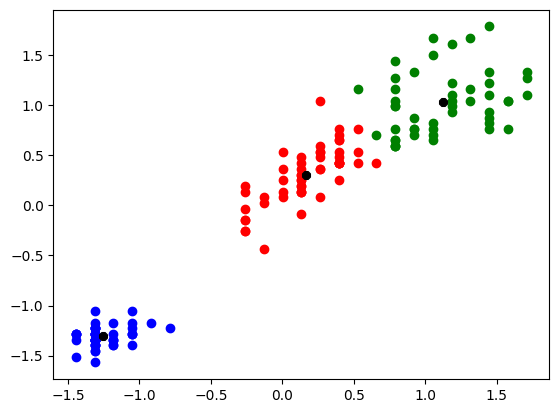

In [74]:
df1 = iris_data[iris_data['prediction'] == 0]
df2 = iris_data[iris_data['prediction'] == 1]
df3 = iris_data[iris_data['prediction'] == 2]

plt.scatter(df1['PetalWidthCm'],df1['PetalLengthCm'],color='green')
plt.scatter(df2['PetalWidthCm'],df2['PetalLengthCm'],color='blue')
plt.scatter(df3['PetalWidthCm'],df3['PetalLengthCm'],color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='8')
plt.show()

In [79]:
sse = []
k_range = range(1,10)
for k in k_range:
  kms = KMeans(n_clusters=k)
  kms.fit(iris_data[['PetalWidthCm','PetalLengthCm']])
  sse.append(kms.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

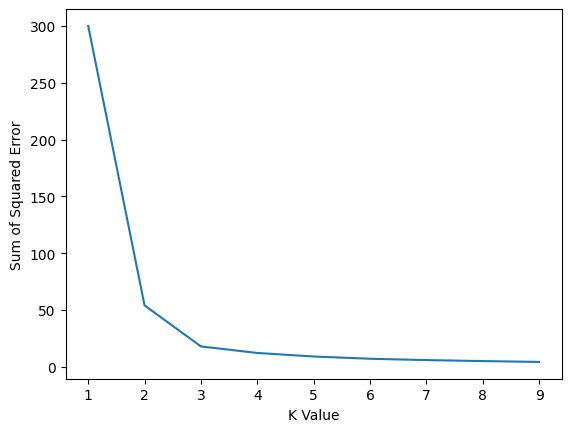

In [82]:
plt.plot(k_range,sse)
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Error")
plt.show()

# Therefore Optimal Value of K is 3